In [1]:
# %%
# 📌 INSTRUCTIONS – PLEASE READ BEFORE RUNNING THIS SCRIPT

# This script performs the following analyses and visualizations:
# 1. Plotting reconstructed mean temperature and true temperature at a specific probe (0.91, 0.02, 0.55) over time with confidence intervals.
# 2. Plotting reconstructed and true heat flux at a probe on the hot-side boundary (0.91, 0.0, 0.55).
# 3. Plotting total reconstructed and true heat flux across the entire hot-side boundary over time.
# 4. Plotting confidence intervals for reconstructed heat flux across the hot-side boundary.
# 5. Computing and plotting error metrics: Mean Relative Error, Sum Relative Error, MSE, MAE.
# 6. Calculating and printing the mean and standard deviation of the following files:
#    - "condNumberAutoCovInverse.txt"
#    - "condNumberCrossCov.txt"
#    - "condNumberKalmanGain.txt"

# ⚠️ NOTE: If you modify the probe locations (temperature or heat flux) in the C++ source file `06enKFwDF_3dIHTP.C`, 
# make sure to update the corresponding coordinates and related comments in this script.

#     - Temperature probe location: (0.91, 0.02, 0.55)
#       ↳ See: `setProbe` variable in `06enKFwDF_3dIHTP.C`
#     - Heat flux probe location: (0.91, 0.0, 0.55)
#       ↳ See: `hotSide_probeLocation` variable in `06enKFwDF_3dIHTP.C`


In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import sys
import seaborn as sns
import os

In [2]:
sys.path.insert(0, "./")

plt.rc('font', family='Times New Roman', size=18)                               # You can adjust the font size (14 in this case) as needed
plt.figure(figsize=(10, 6))                                                     # You can adjust the figure size as needed
colors = sns.color_palette('deep', n_colors=2)

#plt.style.use('classic')
#params = {'legend.fontsize': 'x-large','figure.figsize': (10, 8), 'axes.labelsize': 'x-large', 'axes.titlesize':'x-large', 'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
#pylab.rcParams.update(params)

#time = np.loadtxt("./ITHACAoutput/true/trueTimeVec_mat.txt")                                  # 100, Loading time vector [100 equal to the number of time steps]

<Figure size 1000x600 with 0 Axes>

In [3]:
# Create Results folder if it doesn't exist
output_dir = "../Results"  # Adjust path as needed if 'Files' is in the current directory
os.makedirs(output_dir, exist_ok=True)

In [10]:
#time = np.loadtxt("./ITHACAoutput/true/trueTimeVec_mat.txt")                                  # 100, Loading time vector [100 equal to the number of time steps]
time = np.loadtxt("./ITHACAoutput/true/trueTimeVec_mat.txt")                                   # 100, Loading time vector [100 equal to the number of time steps]

#⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬ Plotting reconstructed mean temperature and true temperature at a specific probe(0.91, 0.02 , 0.55) over time.
probe_true = np.loadtxt("./ITHACAoutput/true/probe_true_mat.txt")                             # Column Vector(100), Reading true temprature [100 equal to the number of time instants] file at the probe  
probe_rec =  np.loadtxt("./ITHACAoutput/reconstruction/probe_rec_mat.txt")                    # Column Vector(100), Reading reconstructed mean[100 equal to the number of time steps] temprature file at the probe 
state_min =  np.loadtxt("./ITHACAoutput/reconstruction/probeState_minConf_mat.txt")           # Column Vector(100), Reading the 5th percentile value of state ensemble at different time steps 
state_max =  np.loadtxt("./ITHACAoutput/reconstruction/probeState_maxConf_mat.txt")           # Column Vector(100), Reading the 95th  percentile value of state ensemble at different time steps 

print("Size of probe_rec array:", probe_rec.shape) # It must be equal to the number of time steps 
print("Size of state_min array:", state_min.shape) # It must be equal to the number of time steps 
print("Size of state_max array:", state_max.shape) # It must be equal to the number of time steps 
print('Size of trueTimeVec_mat array:', time)
print('Size of trueTimeVec_mat array:', time.shape)

Size of probe_rec array: (100,)
Size of state_min array: (100,)
Size of state_max array: (100,)
Size of trueTimeVec_mat array: [ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2
 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.
 14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6 16.8
 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4 19.6
 19.8 20. ]
Size of trueTimeVec_mat array: (100,)


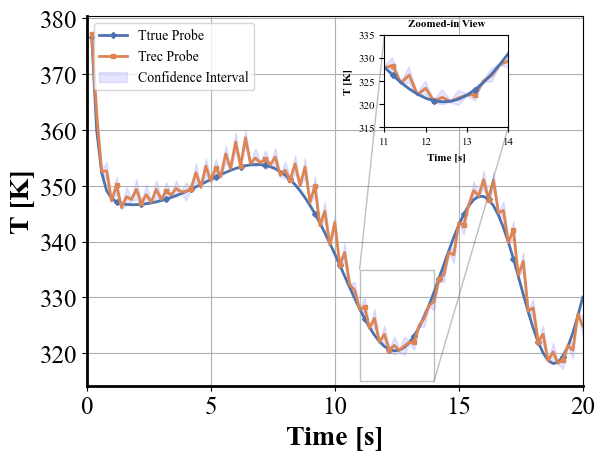

In [11]:
#fig = plt.figure(1,figsize=(10,6))
fig = plt.figure()
ax = plt.gca()  # This is important, we keep this axis for both base plot and inset

#plt.plot(time, probe_true,"b", linewidth = 2, label="Ttrue Probe")
#plt.plot(time, probe_rec, linewidth=2, color='k', linestyle='--', label='Trec Probe')
plt.plot(time, probe_true, color=colors[0], label='Ttrue Probe', linewidth=2, marker='D', markersize=3, markevery=5)
plt.plot(time, probe_rec,  color=colors[1], label='Trec Probe',  linewidth=2, marker='s', markersize=3, markevery=5)

# Using plt.fill_between to visualize uncertainty or confidence intervals in the state values by filling the area between state_min and  state_max curves representing the 5th and 95th percentile values of the state ensemble at different time steps, respectively.
plt.fill_between(time, state_min, state_max, color='b', alpha=.1, label='Confidence Interval') # Fill the area between state_min and state_max with a specified color and transparency.
#plt.fill_between(time, state_min, state_max, color=colors[0], label='Confidence Interval', alpha=.1)

# Set labels and title
plt.grid(True)
plt.legend(loc='upper left', prop={'size': 10})
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)                                           # X-axis line width
ax.spines['left'].set_linewidth(2)                                             # Y-axis line width
plt.xlabel('Time [s]', fontsize=20, weight='bold')
plt.ylabel('T [K]', fontsize=20, weight='bold')
plt.xlim(0, 20)                                                                 # X-axis range from 0 to 20
#plt.title('True and Reconstructed Mean Temperature at a Probe(0.91, 0.02 , 0.55) over time.')

# Create inset_axes
axin = ax.inset_axes([0.6, 0.7, 0.25, 0.25])  # Adjust position and size as needed

# Plot reconstructed mean on inset_axes
axin.plot(time, probe_rec, color=colors[1], label='Trec Probe',  linewidth=2, marker='s', markersize=3, markevery=5)
axin.plot(time, probe_true,color=colors[0], label='Ttrue Probe', linewidth=2, marker='D', markersize=3, markevery=5)
axin.fill_between(time, state_min, state_max, color='b', alpha=.1, label='Confidence Interval')

# Set x-axis and y-axis limits for inset_axes
axin.set_xlim(11, 14)  # Set x-axis limits to [11, 14]
axin.set_ylim(315, 335)  # Set y-axis limits to [315, 335]

# Add labels and title for inset_axes
axin.set_xlabel('Time [s]', fontsize=8, weight='bold')
axin.set_ylabel('T [K]', fontsize=8, weight='bold')
axin.set_title('Zoomed-in View', fontsize=8, weight='bold')

# Change the size of tick labels for both x-axis and y-axis
axin.tick_params(axis='both', labelsize=8)  # Adjust labelsize as needed

# Embed axin in the main plot
ax.indicate_inset_zoom(axin)

# Save the figure with zoomed-in view
plt.savefig(os.path.join(output_dir, 'Figure 11B TrueAndReconstructedMeanTemperatureAtaProbe_0.91_0.02_0.55_OverTimeMultiquadric.png'), dpi=400, bbox_inches='tight')


plt.show()


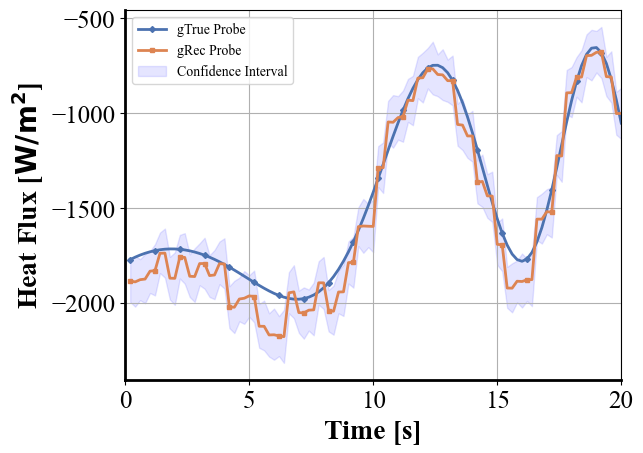

In [12]:
gTrue_probe = np.loadtxt("./ITHACAoutput/reconstruction/gTrue_probe_mat.txt")               # 100, Reading the true heat flux file at the probe
gRec_probe = np.loadtxt("./ITHACAoutput/reconstruction/gRec_probe_mat.txt")                 # 100, Reading the reconstructed mean heat flux at the probe
gRec_probeMaxConf = np.loadtxt("./ITHACAoutput/reconstruction/gRec_probeMaxConf_mat.txt")   # 100, Reading the reconstructed MaxConf heat flux at the probe
gRec_probeMinConf = np.loadtxt("./ITHACAoutput/reconstruction/gRec_probeMinConf_mat.txt")   # 100, Reading the reconstructed MinConf heat flux at the probe

#fig = plt.figure(3,figsize=(10,6))
fig = plt.figure()

#plt.plot(time, gTrue_probe,      linewidth = 2, color='b', label="gTrue Probe" )
#plt.plot(time, gRec_probe,"k--", linewidth = 2, label="gRec Probe")
plt.plot(time, gTrue_probe, color=colors[0], label='gTrue Probe', linewidth=2, marker='D', markersize=3, markevery=5)
plt.plot(time, gRec_probe,  color=colors[1], label='gRec Probe',  linewidth=2, marker='s', markersize=3, markevery=5)

# Using plt.fill_between to visualize uncertainty or confidence intervals in the heatflux values by filling the area between heat flux min confidence of the probe and  heat flux max confidence of the probe curves representing the 5th and 95th percentile values of the heat flux parameter ensemble at different time steps, respectively.
plt.fill_between(time, gRec_probeMinConf, gRec_probeMaxConf , color='b', alpha=.1, label='Confidence Interval')
plt.grid(True)
plt.legend(loc='upper left', prop={'size': 10})
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)                                           # X-axis line width
ax.spines['left'].set_linewidth(2)                                             # Y-axis line width

plt.xlabel('Time [s]', fontsize=20, weight='bold')
#plt.ylabel('Heat Flux[w/m^2]', fontsize=25)
plt.ylabel(r'Heat Flux [$\mathbf{W/m^2}$]', fontsize=20, weight='bold')
plt.xlim(0, 20)                                                                
#plt.ylim(-500, -0.001) 
#plt.title('True and Reconstructed Mean Heat Flux at a Probe(0.91, 0.0 , 0.55) over time')
plt.savefig(os.path.join(output_dir, 'Figure 12B TrueAndReconstructedMeanHeatFluxAtProbe_0.91_0.0_0.55_over_time.png'), dpi=400, bbox_inches='tight')

plt.show()

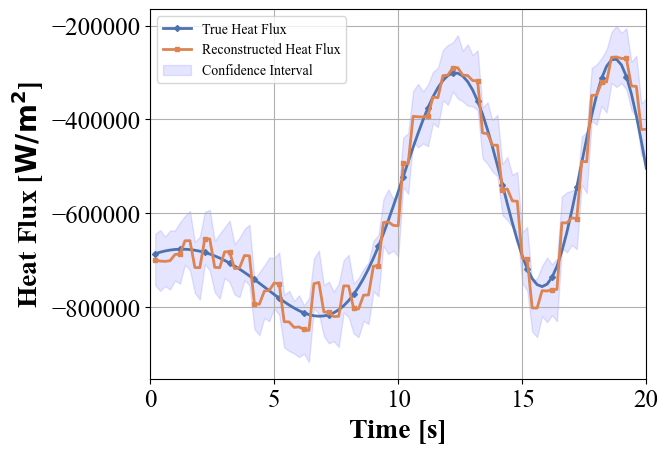

In [13]:
#⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬ Plotting reconstructed mean heat flux and true heat flux at the entire hotSide BC over time.
# The total heat flux on the hot side is not a really good quantity. Because maybe on the corner, there are some places where we get very bad.
   # Would be better to have a MSE or realtive error plot.
parameterMean  =   np.loadtxt("./ITHACAoutput/reconstruction/parameterMean_mat.txt")                         # parameterMean_mat[25(mean weight),100(timesteps)] stores the reconstructed mean weight
heatFluxSpaceRBF = np.loadtxt("./ITHACAoutput/projection/HeatFluxSpaceRBF/heat_flux_space_basis_mat.txt")  # This matrix[25(RBF),400(faces)] stores heatFluxSpaceBasis data

parameterPriorMeanWithoutShifting = np.load('parameterPriorMeanWithoutShifting.npy')     # 5
parameterPriorMean = np.load('parameterPriorMean.npy')                                   # 5

# RBFs must be less than measurements or at least are equal to measurements
# By using RBF formula with the help of two above matrix, we create a matrix named out(100,400) containing the reconstructed heat flux for each face at each time step.

n1, m1 = parameterMean.shape      # n1 = 25(mean/weight), m1=100(times)
n, m   = heatFluxSpaceRBF.shape   # n = 25(RBF),          m=400(faces)

out = np.zeros((m1, m))                                         #(100,400)
outVectorAtTimeZeroWithoutShifting = np.zeros((1, m))           #(1,400)
outVectorAtTimeZeroWithShifting    = np.zeros((1, m))              #(1,400)

for j in range(m):
    outVectorAtTimeZeroWithoutShifting[0,j]= np.sum(parameterPriorMeanWithoutShifting[:,0]*heatFluxSpaceRBF[:, j])
    outVectorAtTimeZeroWithShifting[0,j]   = np.sum(parameterPriorMean[:,0]*heatFluxSpaceRBF[:, j])
outVectorAtTimeZeroWithoutShifting = np.transpose(outVectorAtTimeZeroWithoutShifting)           # This matrix out [400(faces), 1(t =0)]
outVectorAtTimeZeroWithShifting    = np.transpose(outVectorAtTimeZeroWithShifting)              # This matrix out [400(faces), 1(t =0)]

out = heatFluxSpaceRBF.T @ parameterMean  # Shape: [400, 100]
column_sums2 = out.sum(axis=0)    # [1,100] Integral or sum each column of the matrix out. Therefore, each element of the resulted row vector represents the total recunstructed heat flux at the hotSide BC at each time step

# trueBC = np.loadtxt("./ITHACAoutput/true/trueBC_mat.txt")                           # Why this vector is empty?
gTrue = np.loadtxt("./ITHACAoutput/projection/TrueHeatFlux/HeatFluxTrue_mat.txt")     # This matrix[100,400]
gTrue = np.transpose(gTrue)#  gTrue [400(faces), 101(timesteps)]
column_sums1 = gTrue.sum(axis=0)  # [1,101] Integral or sum of each column of the matrix gTrue. Therefore, each element of the resulted row vector represents the true heat flux at the hotSide BC at each time step

#fig = plt.figure(2,figsize=(10,6))
fig1 = plt.figure()

#plt.plot(time, column_sums1[:-1],"b", linewidth = 2, label="True Heat Flux")
#plt.plot(time, column_sums2, "k--" ,  linewidth = 2, label="Reconstructed Heat Flux")
plt.plot(time, column_sums1[:-1],  color=colors[0], label='True Heat Flux',            linewidth=2, marker='D', markersize=3, markevery=5)
plt.plot(time, column_sums2,       color=colors[1], label='Reconstructed Heat Flux',   linewidth=2, marker='s', markersize=3, markevery=5)

plt.grid(True)
plt.legend(loc='upper left', prop={'size': 10})
ax.spines['bottom'].set_linewidth(2)                                           # X-axis line width
ax.spines['left'].set_linewidth(2)                                             # Y-axis line width

plt.xlabel('Time [s]', fontsize=20, weight='bold')
plt.ylabel(r'Heat Flux [$\mathbf{W/m^2}$]', fontsize=20, weight='bold')
plt.xlim(0, 20)   
#plt.title('True and Reconstructed Mean Heat Flux at the hotSide.')
#plt.savefig('TrueAndReconstructedMeanHeatFluxAtTheHotSide.png', dpi=400, bbox_inches='tight')
plt.close(fig1)  # ❌ This prevents the first figure from being displayed

param_min = np.loadtxt("./ITHACAoutput/reconstruction/parameter_minConf_mat.txt")     # [25(5th of each ensemble weight), 100(timesteps)]  stores the 5th  percentile value of the parameter(weight) ensemble at different time steps
param_max = np.loadtxt("./ITHACAoutput/reconstruction/parameter_maxConf_mat.txt")     # [25(95th of each ensemble weight),100(timesteps)]  stores the 95th percentile value of the parameter(weight) ensemble at different time steps

# no need these two lines
param_min_vector = param_min.sum(axis=0)  #[1,100] Sum each column of the param_min matrix. Therefore, each element of the resulted vector represents the total 5th  percentile value of the parameter(weight)ensemble at the hotSide BC at each time step
param_max_vector = param_max.sum(axis=0)  #[1,100] Sum each column of the param_min matrix. Therefore, each element of the resulted vector represents the total 95th  percentile value of the parameter(weight) ensemble at the hotSide BC at each time step
# no need these two lines

out1 = np.zeros((m1, m))    #(100,400)
out2 = np.zeros((m1, m))    #(100,400)

for i in range(m1):         #m1=100(times)
    for j in range(m):      #m=400(faces)
        out1[i, j] = np.sum(param_min[:, i] * heatFluxSpaceRBF[:, j])                 # This matrix[100(timesteps), 400(heat flux min confidence)]
        out2[i, j] = np.sum(param_max[:, i] * heatFluxSpaceRBF[:, j])                 # This matrix[100(timesteps), 400(heat flux min confidence)]
out1 = np.transpose(out1) #[400(heat flux min confidence), 100(timesteps)]
out2 = np.transpose(out2) #[400(heat flux min confidence), 100(timesteps)]
column_sums3 = out1.sum(axis=0) # [1,100]Sum of each column of the matrix out1. Therefore, each element of the resulted vector represents the total heat flux min confidence (5th)  at the hotSide BC at each time step
column_sums4 = out2.sum(axis=0) # [1,100]Sum of each column of the matrix out2. Therefore, each element of the resulted vector represents the total heat flux max confidence (95th) at the hotSide BC at each time step



#fig = plt.figure(4,figsize=(10,6))
fig = plt.figure()

#plt.plot(time, column_sums1[1:],"b", linewidth = 2, label="True Heat Flux")
#plt.plot(time, column_sums2, "k--" , linewidth = 2, label="Reconstructed Heat Flux")
plt.plot(time, column_sums1[1:], color=colors[0], label='True Heat Flux',            linewidth=2, marker='D', markersize=3, markevery=5)
plt.plot(time, column_sums2,     color=colors[1], label='Reconstructed Heat Flux',   linewidth=2, marker='s', markersize=3, markevery=5)

# Using plt.fill_between to visualize uncertainty or confidence intervals in the heatflux values by filling the area between heat flux min confidence and  heat flux max confidence curves representing the 5th and 95th percentile values of the heat flux parameter ensemble at different time steps, respectively.
plt.fill_between(time, column_sums3, column_sums4 , color='b', alpha=.1, label='Confidence Interval')

#minConfidence = np.loadtxt("./ITHACAoutput/reconstuction/probe_minConfidence_mat.txt")   # not available
#maxConfidence = np.loadtxt("./ITHACAoutput/reconstuction/probe_MaxConfidence_mat.txt")   # not available

#for i in range(reconstructedBC.shape[0]):                                                # not required
    #plt.plot(time, reconstructedBC[i,:]) 
#plt.fill_between(time, minConfidence, maxConfidence, color='b', alpha=.1)                # not available

# Using plt.fill_between to visualize uncertainty or confidence intervals in the parameter values by filling the area between param_min and  param_max curves representing the 5th and 95th percentile values of the parameter ensemble at different time steps, respectively.
#plt.fill_between(time, param_min_vector, param_max_vector, color='b', alpha=.1, label='Confidence Interval') # Fill the area between param_min and param_max with a specified color and transparency.

plt.grid(True)
plt.legend(loc='upper left', prop={'size': 10})
ax.spines['bottom'].set_linewidth(2)                                           # X-axis line width
ax.spines['left'].set_linewidth(2)                                             # Y-axis line width

plt.xlabel('Time [s]', fontsize=20, weight='bold')
plt.ylabel(r'Heat Flux [$\mathbf{W/m^2}$]', fontsize=20, weight='bold')
plt.xlim(0, 20)   
#plt.title('True and Reconstructed Mean Heat Flux at the hotSide with Confidence Interval.')
plt.savefig(os.path.join(output_dir, 'Figure 13B TrueAndReconstructedMeanHeatFluxAtTheHotSideWithConfidenceInterval.png'), dpi=400, bbox_inches='tight')

plt.show()
#⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫ Plotting reconstructed mean heat flux and true heat flux at the hotSide BC over time.


Mean of Mean Relative Error: 6.313565305292404
Mean Relative Error at t=0 with Shifting: 10.80%
Mean Relative Error at t=0 without Shifting: 10.80%


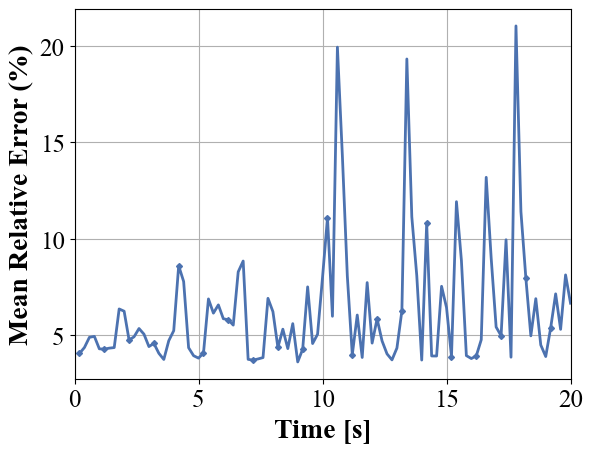

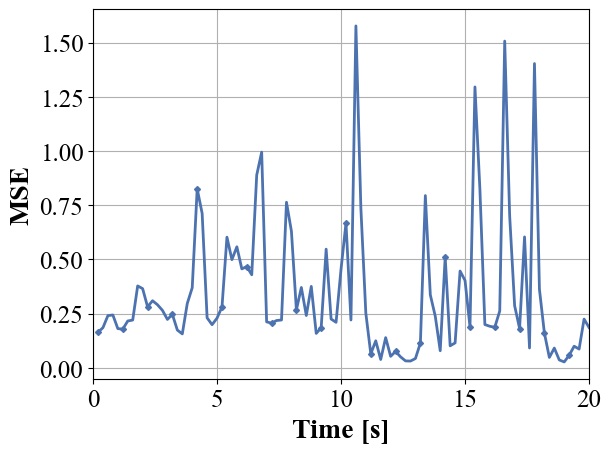

In [14]:
#⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬ Plotting the MSE, MAE, mean and sum relative error of the reconstructed heat flux compared to the true heat flux over time.

# The total heat flux on the hot side is not a really good quantity. Because maybe on the corner, there are some places where we get very bad.
   # Would be better to have a MSE or realtive error plot.
# out   = reconstructed heat flux  [400(faces), 100(timesteps)]
# gTrue =  true heat flux          [400(faces), 101(timesteps)]
# time  100 time steps
gTrue = gTrue[:, :-1]  # Remove the last time step from gTrue

relative_error = np.abs((gTrue - out) / gTrue) * 100                           # Calculate the relative error
mean_relative_error = np.mean(relative_error, axis=0)                          # Calculate the mean relative error across all faces at each time step
sum_relative_error = np.sum(relative_error, axis=0)                            # Calculate the sum of relative errors across all faces for each time step


mean_relative_error_at_t0_WithoutShifting = np.abs((gTrue[:,0]-outVectorAtTimeZeroWithoutShifting)/gTrue[:,0]) *100
mean_relative_error_at_t0_WithoutShifting = np.mean(mean_relative_error_at_t0_WithoutShifting)

mean_relative_error_at_t0_WithShifting = np.abs((gTrue[:,0]-outVectorAtTimeZeroWithShifting)/gTrue[:,0]) *100
mean_relative_error_at_t0_WithShifting = np.mean(mean_relative_error_at_t0_WithShifting)

# MSE values represent the average squared error in its typical form (in its original data and not as a percentage)between predicted values (out) and actual values (gTrue)
 # without applying any additional normalization or scaling.
mse = np.mean(((out - gTrue) ** 2)/(out.shape[0]*out.shape[1]), axis=0)        # from sklearn.metrics import mean_squared_error       mse = mean_squared_error(gTrue, out, multioutput='raw_values')    Incorrect
mae = np.mean(np.abs(out - gTrue), axis=0)*100                                 #from sklearn.metrics import mean_absolute_error       mae = mean_absolute_error(gTrue, out, multioutput='raw_values') 

# Export mean of the relative error over space and then over time to a text file
mean_of_mean_relative_error = np.mean(mean_relative_error)                     
# Define the filename
filename = os.path.join(output_dir, "meanOfMeanRelativeError.txt")
with open(filename, "w") as file:
    file.write(f"Mean of Mean Relative Error: {mean_of_mean_relative_error}")

# Export the mean relative error at t=0 with Shifting Weight Factor  to a text file
filename = os.path.join(output_dir, "meanRelativeErrorAtT0.txt")
with open(filename, "w") as file:
    file.write(f"Mean Relative Error at t=0 withShifting: {mean_relative_error_at_t0_WithShifting:.2f}%")

# Export the mean relative error at t=0 without shifting to a text file
filename = os.path.join(output_dir, "meanRelativeErrorAtT0WithoutShifting.txt")
with open(filename, "w") as file:
    file.write(f"Mean Relative Error at t=0 without shifting: {mean_relative_error_at_t0_WithoutShifting:.2f}%")

print(f"Mean of Mean Relative Error: {mean_of_mean_relative_error}")
print(f"Mean Relative Error at t=0 with Shifting: {mean_relative_error_at_t0_WithShifting:.2f}%")
print(f"Mean Relative Error at t=0 without Shifting: {mean_relative_error_at_t0_WithoutShifting:.2f}%")

#Plot the mean relative error over time, 
#fig = plt.figure(5,figsize=(10,6))
fig = plt.figure()
#plt.plot(time, mean_relative_error, marker='o', linestyle='-')
plt.plot(time, mean_relative_error,  color=colors[0], linewidth=2, marker='D', markersize=3, markevery=5)

plt.grid(True)
ax.spines['bottom'].set_linewidth(2)                                           # X-axis line width
ax.spines['left'].set_linewidth(2)                                             # Y-axis line width
plt.xlabel('Time [s]', fontsize=20, weight='bold')
plt.ylabel('Mean Relative Error (%)', fontsize=20, weight='bold')
plt.xlim(0, 20)  
#plt.title('Mean Relative Error Over Time')
#plt.savefig(os.path.join(output_dir, 'MeanRelativeErrorOverTime.png'), dpi=400, bbox_inches='tight')

plt.show()

#Plot the mean relative error over time, log scale
# fig = plt.figure(6, figsize=(10, 8))
# plt.plot(time, mean_relative_error, marker='o', linestyle='-')
# plt.title('Mean Relative Error Over Time- log scale')
# plt.xlabel('Time Step')
# plt.ylabel('Mean Relative Error (%)- log scale')
# plt.ylim(1, 100)                                                                # limit the range from 1 to 100
# plt.yscale('log')                                                               # Set the vertical axis to log scale
# plt.grid(True) 
# plt.show()

# Plot the sum relative error over time
# fig = plt.figure(7,figsize=(10,8))
# plt.plot(time, sum_relative_error, marker='o', linestyle='-')
# plt.xlabel('Time Step')
# plt.ylabel('Sum Relative Error (%)')
# plt.title('Sum Relative Error Over Time')
# plt.grid(True)
# plt.show()


# Plot Mean Squared Error (MSE) over time
#fig = plt.figure(8, figsize=(10, 6))
fig = plt.figure()
#plt.plot(time, mse, marker='o', linestyle='-')
plt.plot(time, mse,  color=colors[0], linewidth=2, marker='D', markersize=3, markevery=5)

plt.grid(True)
ax.spines['bottom'].set_linewidth(2)                                           # X-axis line width
ax.spines['left'].set_linewidth(2)                                             # Y-axis line width
plt.xlabel('Time [s]', fontsize=20, weight='bold')
plt.ylabel('MSE', fontsize=20, weight='bold')
plt.xlim(0, 20)  
#plt.title('Mean Squared Error (MSE) Over Time')
#plt.savefig(os.path.join(output_dir, 'MeanSquaredError.png'), dpi=400, bbox_inches='tight')

plt.show()


# Plot Mean Absolute Error (MAE) over time
# fig = plt.figure(9, figsize=(10, 8))
# plt.plot(time, mae, marker='o', linestyle='-')
# plt.title('Mean Absolute Error (MAE) Over Time')
# plt.xlabel('Time Step')
# plt.ylabel('MAE (%)')
# plt.grid(True)
# plt.show()
#⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫ Plotting the MSE, MAE, mean and sum relative error of the reconstructed heat flux compared to the true heat flux over time.


In [15]:

#⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫ Calculating and printing the mean and standard deviation of "condNumberAutoCovInverse.txt," "condNumberCrossCov.txt," and "condNumberKalmanGain.txt,"
# Load data from the text files
autoCovInverse_data = np.loadtxt("condNumberAutoCovInverse.txt")
crossCov_data = np.loadtxt("condNumberCrossCov.txt")
kalmanGain_data = np.loadtxt("condNumberKalmanGain.txt")

# Calculate the mean and standard deviation for each column
autoCovInverse_mean = np.mean(autoCovInverse_data, axis=0)
autoCovInverse_std = np.std(autoCovInverse_data, axis=0)

crossCov_mean = np.mean(crossCov_data, axis=0)
crossCov_std = np.std(crossCov_data, axis=0)

kalmanGain_mean = np.mean(kalmanGain_data, axis=0)
kalmanGain_std = np.std(kalmanGain_data, axis=0)

# Save to ../Results/
filename = os.path.join(output_dir, "autoCovInverse_mean_std.txt")
with open(filename, "w") as file:
    file.write(f"autoCovInverse_mean: {autoCovInverse_mean}\n")
    file.write(f"autoCovInverse_std: {autoCovInverse_std}\n")
    
filename = os.path.join(output_dir, "crossCov_mean_std.txt")
with open(filename, "w") as file:
    file.write(f"crossCov_mean: {crossCov_mean}\n")
    file.write(f"crossCov_std: {crossCov_std}\n")

filename = os.path.join(output_dir, "kalmanGain_mean_std.txt")
with open(filename, "w") as file:
    file.write(f"kalmanGain_mean: {kalmanGain_mean}\n")
    file.write(f"kalmanGain_std: {kalmanGain_std}\n")

# Print to console
print(f"autoCovInverse_mean: {autoCovInverse_mean}")
print(f"autoCovInverse_std: {autoCovInverse_std}")

print(f"crossCov_mean: {crossCov_mean}")
print(f"crossCov_std: {crossCov_std}")

print(f"kalmanGain_mean: {kalmanGain_mean}")
print(f"kalmanGain_std: {kalmanGain_std}")

#⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫⏫ Calculating and printing the mean and standard deviation of "condNumberAutoCovInverse.txt," "condNumberCrossCov.txt," and "condNumberKalmanGain.txt,"


autoCovInverse_mean: 622.68141
autoCovInverse_std: 73.06221475634241
crossCov_mean: 357.90921000000003
crossCov_std: 34.62332233431535
kalmanGain_mean: 4.654655999999999
kalmanGain_std: 0.28704731954853724


In [16]:
# Dummy fallback in case the file doesn't exist in the new session
xyz_path = "./xyz.npy"
xyz_txt_path = os.path.join(output_dir, "xyz.txt")

# If file exists, convert it
if os.path.exists(xyz_path):
    xyz = np.load(xyz_path)
    np.savetxt(xyz_txt_path, xyz, fmt="%.10f")
    saved_path = xyz_txt_path
else:
    saved_path = "xyz.npy not found."

saved_path

'../Results\\xyz.txt'

In [4]:
# Define input and output filenames
temp_npy_path = "./Temp.npy"
temp_txt_path = os.path.join(output_dir, "Temp.txt")

# Convert if file exists
if os.path.exists(temp_npy_path):
    temp = np.load(temp_npy_path)
    np.savetxt(temp_txt_path, temp, fmt="%.10f")
    result = temp_txt_path
else:
    result = "Temp.npy not found."

result


'../Results\\Temp.txt'